In [1]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/6.03M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 6.03M/6.03M [00:00<00:00, 109MB/s]


In [2]:
!unzip /kaggle/working/diabetes-health-indicators-dataset.zip -d /kaggle/working/diabetes-health-indicators-dataset.

Archive:  /kaggle/working/diabetes-health-indicators-dataset.zip
  inflating: /kaggle/working/diabetes-health-indicators-dataset./diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: /kaggle/working/diabetes-health-indicators-dataset./diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: /kaggle/working/diabetes-health-indicators-dataset./diabetes_binary_health_indicators_BRFSS2015.csv  


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [4]:
features = pd.read_csv('/kaggle/working/diabetes-health-indicators-dataset./diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [5]:
print(features.columns)
print(features.shape)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(70692, 22)


In [6]:
for col in features.columns:
    print(f"{features[col].value_counts()}")

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
HighBP
1.0    39832
0.0    30860
Name: count, dtype: int64
HighChol
1.0    37163
0.0    33529
Name: count, dtype: int64
CholCheck
1.0    68943
0.0     1749
Name: count, dtype: int64
BMI
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
83.0       1
85.0       1
80.0       1
12.0       1
86.0       1
Name: count, Length: 80, dtype: int64
Smoker
0.0    37094
1.0    33598
Name: count, dtype: int64
Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64
HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64
PhysActivity
1.0    49699
0.0    20993
Name: count, dtype: int64
Fruits
1.0    43249
0.0    27443
Name: count, dtype: int64
Veggies
1.0    55760
0.0    14932
Name: count, dtype: int64
HvyAlcoholConsump
0.0    67672
1.0     3020
Name: count, dtype: int64
AnyHealthcare
1.0    67508
0.0     3184
Name: count, dtype: int64
NoDocbcCost
0.0    64053
1.0     6639
Name: count, dty

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [8]:
features.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# PreProcessing

In [9]:
# gộp
features.loc[features['Education'] < 3, 'Education'] = 3

In [10]:
features.drop_duplicates(inplace=True)
features.reset_index(drop=True, inplace=True)

In [11]:
# loại bỏ các dữ liệu trùng lặp
features.drop_duplicates(inplace=True)
features.reset_index(drop=True, inplace=True)
Sscaler = StandardScaler()
Rscaler = RobustScaler()
Mscaler = MinMaxScaler()
features_standardized = pd.DataFrame(Sscaler.fit_transform(features), columns=features.columns)
features_robust = pd.DataFrame(Rscaler.fit_transform(features), columns=features.columns)
features_MinMax = pd.DataFrame(Mscaler.fit_transform(features), columns=features.columns)



features[['BMI', 'Age', 'GenHlth']] = features_standardized[['BMI', 'Age', 'GenHlth']]
features[['MentHlth', 'PhysHlth']] = features_robust[['MentHlth', 'PhysHlth']]
features[['Education', 'Income']] = features_MinMax[['Education', 'Income']]

In [12]:
features

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,-0.553426,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.123058,1.666667,5.000000,0.0,1.0,-1.610757,1.000000,1.000000
1,0.0,1.0,1.0,1.0,-0.553426,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.123058,0.000000,0.000000,0.0,1.0,1.188163,1.000000,1.000000
2,0.0,0.0,0.0,1.0,-0.553426,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-1.682092,0.000000,1.666667,0.0,1.0,1.538027,1.000000,1.000000
3,0.0,1.0,1.0,1.0,-0.273626,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.123058,0.000000,0.500000,0.0,1.0,0.838298,1.000000,1.000000
4,0.0,0.0,0.0,1.0,-0.133727,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-0.779517,0.000000,0.000000,0.0,0.0,-0.211297,0.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69050,1.0,0.0,1.0,1.0,0.985471,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.025633,0.000000,0.000000,0.0,0.0,-0.911027,0.333333,0.000000
69051,1.0,0.0,1.0,1.0,-0.133727,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,-0.779517,0.000000,0.000000,1.0,1.0,0.488433,0.000000,0.714286
69052,1.0,1.0,1.0,1.0,-0.693325,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.928207,5.000000,0.000000,1.0,0.0,1.538027,1.000000,0.428571
69053,1.0,1.0,1.0,1.0,-1.672623,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.025633,0.000000,0.000000,1.0,0.0,0.838298,0.000000,0.428571


# chia tập thành train | test

In [13]:
class_0 = features[features['Diabetes_binary'] == 0]
class_1 = features[features['Diabetes_binary'] == 1]

x_class_0, y_class_0 = class_0.drop(columns=['Diabetes_binary'], axis=1), class_0['Diabetes_binary']
x_class_1, y_class_1 = class_1.drop(columns=['Diabetes_binary'], axis=1), class_1['Diabetes_binary']

x_0_train, x_0_test, y_0_train, y_0_test = train_test_split(x_class_0, y_class_0, test_size=0.2, random_state=1)
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_class_1, y_class_1, test_size=0.2, random_state=1)

x_train = pd.concat(objs=[x_0_train, x_1_train], ignore_index=True).to_numpy()
y_train = pd.concat(objs=[y_0_train, y_1_train], ignore_index=True).to_numpy()
index = np.arange(x_train.shape[0])
np.random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

x_test = pd.concat(objs=[x_0_test, x_1_test], ignore_index=True).to_numpy()
y_test = pd.concat(objs=[y_0_test, y_1_test], ignore_index=True).to_numpy()
index = np.arange(x_test.shape[0])
np.random.shuffle(index)
x_test = x_test[index]
y_test = y_test[index]

# chia tập thành train | val | test

In [14]:
class_0 = features[features['Diabetes_binary'] == 0]
class_1 = features[features['Diabetes_binary'] == 1]

x_class_0, y_class_0 = class_0.drop(columns=['Diabetes_binary'], axis=1), class_0['Diabetes_binary']
x_class_1, y_class_1 = class_1.drop(columns=['Diabetes_binary'], axis=1), class_1['Diabetes_binary']

x_0_train, x_0_test, y_0_train, y_0_test = train_test_split(x_class_0, y_class_0, test_size=0.2, random_state=1)
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_class_1, y_class_1, test_size=0.2, random_state=1)

x_0_train, x_0_val, y_0_train, y_0_val = train_test_split(x_0_train, y_0_train, test_size=0.25, random_state=1)
x_1_train, x_1_val, y_1_train, y_1_val = train_test_split(x_1_train, y_1_train, test_size=0.25, random_state=1)



x_train = pd.concat(objs=[x_0_train, x_1_train], ignore_index=True).to_numpy()
y_train = pd.concat(objs=[y_0_train, y_1_train], ignore_index=True).to_numpy()
index = np.arange(x_train.shape[0])
np.random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

x_val = pd.concat(objs=[x_0_val, x_1_val], ignore_index=True).to_numpy()
y_val = pd.concat(objs=[y_0_val, y_1_val], ignore_index=True).to_numpy()
index = np.arange(x_val.shape[0])
np.random.shuffle(index)
x_val = x_val[index]
y_val = y_val[index]

x_test = pd.concat(objs=[x_0_test, x_1_test], ignore_index=True).to_numpy()
y_test = pd.concat(objs=[y_0_test, y_1_test], ignore_index=True).to_numpy()
index = np.arange(x_test.shape[0])
np.random.shuffle(index)
x_test = x_test[index]
y_test = y_test[index]

In [15]:
print(x_train.shape)
print(x_test.shape)

(41433, 21)
(13811, 21)


KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': list(range(1, 100)), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  f1_score
model_knn=KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model_knn,
                           param_grid=param_grid_knn,
                           cv=5, 
                           scoring='f1_macro',
                           n_jobs=-1) 
# Huấn luyện GridSearch
grid_search.fit(x_train, y_train)





In [17]:
model_knn=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],metric=grid_search.best_params_['metric'],weights=grid_search.best_params_['weights'])
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=92)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred=model_knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.7467236260951415
0.7455119040108786


In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_knn, x_val, y_val,scoring='f1_macro', n_repeats=100, random_state=42, n_jobs=-1)


In [20]:
features=features.drop(columns="Diabetes_binary",axis=1)
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print(feature_importances)
columns_drop = feature_importances[feature_importances['Importance Mean'] < 0]['Feature'].tolist()


                 Feature  Importance Mean  Importance Std
0                 HighBP         0.036647        0.002341
1               HighChol         0.020188        0.001950
2              CholCheck         0.019311        0.001971
3                    BMI         0.018782        0.002033
4                 Smoker         0.009358        0.001657
5                 Stroke         0.002364        0.001052
6   HeartDiseaseorAttack         0.001225        0.000644
7           PhysActivity         0.001042        0.000879
8                 Fruits         0.000985        0.001027
9                Veggies         0.000887        0.000360
10     HvyAlcoholConsump         0.000875        0.000873
11         AnyHealthcare         0.000265        0.000337
12           NoDocbcCost         0.000219        0.000971
13               GenHlth         0.000206        0.000762
14              MentHlth         0.000047        0.001286
15              PhysHlth        -0.000003        0.000212
16            

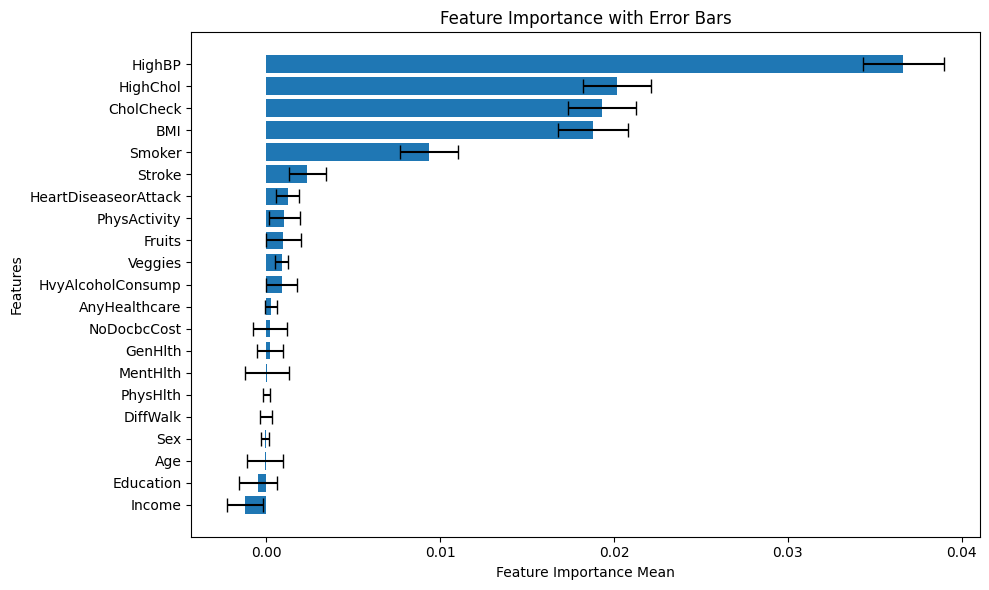

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Feature': feature_importances['Feature'],
    'Importance Mean': feature_importances['Importance Mean'],
    'Importance Std': feature_importances['Importance Std']
}

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(df['Feature'], df['Importance Mean'], xerr=df['Importance Std'], capsize=5)
plt.xlabel('Feature Importance Mean')
plt.ylabel('Features')
plt.title('Feature Importance with Error Bars')
plt.gca().invert_yaxis()  # Đảo ngược trục y để tính năng quan trọng nhất ở trên cùng
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [22]:
x_train=np.concatenate((x_train,x_val),axis=0)
y_train=np.concatenate((y_train,y_val),axis=0)

print(x_train.shape)
print(y_train.shape)

(55244, 21)
(55244,)


In [23]:
features = pd.read_csv('/kaggle/working/diabetes-health-indicators-dataset./diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
features=features.drop(columns="Diabetes_binary",axis=1)
x_train=pd.DataFrame(x_train,columns=features.columns)
y_train=pd.DataFrame(y_train,columns=["Diabetes_binary"])
x_test=pd.DataFrame(x_test,columns=features.columns)
y_test=pd.DataFrame(y_test,columns=["Diabetes_binary"])

In [24]:
x_train=x_train.drop(columns=columns_drop)
x_test=x_test.drop(columns=columns_drop)


In [25]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()


In [26]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=92,metric='manhattan',weights='uniform')

# model_knn=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],metric=grid_search.best_params_['metric'],weights=grid_search.best_params_['weights'])
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=92)

In [27]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred=model_knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.7420172326406488
0.7409414421369955
